# Procesamiento Digital de Imágenes Satelitales
# Instituto Gulich - Mayo - Julio 2025

---
#  Clase 06c: Análisis exploratorio de datos
---


### Objetivos de la notebook:

- En esta notebook esperamos que aprendas a mirar en conjunto datos raster y ROIS vectoriales.

### Datos con los que trabajaremos en esta Notebook:

- Los recortes de Sentinel-2 del Dique Roggero 
    - **S2_dique_20191120.tif** y
    - **S2_dique_20181006.tif**
- Capa vectorial de ROIS
    - **rois_dique.geojson**

```python
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask

import geopandas as gpd

import pandas as pd
import seaborn as sns

from funciones import *
```

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask

import geopandas as gpd

import pandas as pd
import seaborn as sns

from funciones import *

```python
path_proc = '../data/proc/'
path_out = '../data/out/'
path_vector = '../data/raw_data/vector/'
```

In [2]:
path_proc = './proc/'
path_out = './out/'
path_vector = './raw_data/vector/'

```python
raster_fn = os.path.join(path_proc, 'S2_dique_20181006.tif')

with rasterio.open(raster_fn) as src:
    img = src.read()
    gt = src.transform

```

In [3]:
raster_fn = os.path.join(path_proc, 'S2_dique_20181006.tif')

with rasterio.open(raster_fn) as src:
    img = src.read()
    gt = src.transform

```python
rois_vec = gpd.read_file(os.path.join(path_vector, 'rois_dique.geojson'))
rois_vec.head(10)
```

In [4]:
rois_vec = gpd.read_file(os.path.join(path_vector, 'rois_dique.geojson'))
rois_vec.head(10)

C:\Python39\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 6 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


,id,clase,geometry
0,1,agua,"MULTIPOLYGON (((327627.391 6161396.182, 327560..."
1,2,bosque,"MULTIPOLYGON (((327996.99 6163381.143, 328118...."
2,3,urbano,"MULTIPOLYGON (((334008.857 6163386.371, 334573..."
3,4,rural,"MULTIPOLYGON (((329571.576 6156408.423, 329423..."
4,6,rural,"MULTIPOLYGON (((326543.687 6160726.512, 326657..."
5,6,urbano,"MULTIPOLYGON (((336664.534 6160607.32, 336840...."
6,7,humedal,"MULTIPOLYGON (((327973.465 6155108.161, 327991..."
7,8,humedal,"MULTIPOLYGON (((328595.824 6161485.053, 328600..."
8,8,humedal,"MULTIPOLYGON (((324790.574 6154479.398, 324681..."
9,9,humedal,"MULTIPOLYGON (((328585.369 6157966.02, 328575...."


## Uso de _mask_ para extraer valores de un raster a partir de un ROI
### Profundizando un poco en los arrays enmascarados

Como vimos en notebooks anteriores, es posible generar recortes a partir de nuestros polígonos haciendo uso del módulo [rasterio.mask](https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html). Veamos un ejemplo con nuestros datos:

```python
# Aquí extraemos la geometría del primer ROI
roi0 = rois_vec['geometry'][0]

# Utilicemos el ROI anterior para extraer los valores de la imagen
with rasterio.open(raster_fn) as src:
     out_image, out_transform = mask(src, [roi0], crop=True)

# Grafiquemos nuestro subset
fig, ax = plt.subplots()
show(nequalize(out_image[[2, 1, 0]], p=1), ax=ax, transform=out_transform)
# rois_vec.loc[[0]].boundary.plot(ax=ax, color='orangered')
# ax.ticklabel_format(style='plain')
plt.show()
```

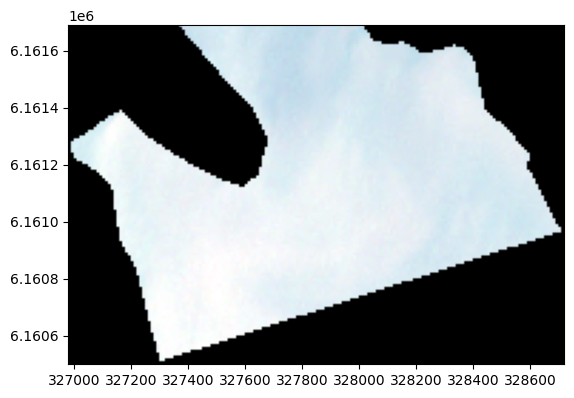

In [5]:
# Aquí extraemos la geometría del primer ROI
roi0 = rois_vec['geometry'][0]

# Utilicemos el ROI anterior para extraer los valores de la imagen
with rasterio.open(raster_fn) as src:
     out_image, out_transform = mask(src, [roi0], crop=True)

# Grafiquemos nuestro subset
fig, ax = plt.subplots()
show(nequalize(out_image[[2, 1, 0]], p=1), ax=ax, transform=out_transform)
# rois_vec.loc[[0]].boundary.plot(ax=ax, color='orangered')
# ax.ticklabel_format(style='plain')
plt.show()

### Haciendo que mask devuelva un array enmascarado con `filled=false`

```python
with rasterio.open(raster_fn) as src:
    out_image, out_transform = mask(src, [roi0], crop=True, filled=False)
```

In [6]:
with rasterio.open(raster_fn) as src:
    out_image, out_transform = mask(src, [roi0], crop=True, filled=False)

```python
type(out_image)
```

In [7]:
type(out_image)

numpy.ma.core.MaskedArray

```python
out_image[:, 0, 0]
```

In [8]:
out_image[:, 0, 0]

masked_array(data=[--, --, --, --, --],
             mask=[ True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float32)

```python
out_image.data.shape
```

In [9]:
out_image.data.shape

(5, 119, 174)

```python
mascara = out_image.mask[0]

mascara
```

In [10]:
mascara = out_image.mask[0]

mascara

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

```python
out_image.data[:, ~mascara]
```

In [11]:
out_image.data[:, ~mascara]

array([[ 0.0835    ,  0.0848    ,  0.0841    , ...,  0.0887    ,
         0.0884    ,  0.0878    ],
       [ 0.0605    ,  0.0608    ,  0.061     , ...,  0.07      ,
         0.0689    ,  0.0692    ],
       [ 0.0493    ,  0.0506    ,  0.0505    , ...,  0.0619    ,
         0.0587    ,  0.0588    ],
       [ 0.0401    ,  0.0397    ,  0.041     , ...,  0.049     ,
         0.0441    ,  0.0477    ],
       [-0.10290827, -0.12070873, -0.10382514, ..., -0.11632103,
        -0.14202332, -0.10422537]], dtype=float32)

## Etiquetado de datos

Para entender mejor nuestros datos, es necesario asociar la información de nuestras imágenes a su respectiva etiqueta, la cual puede provenir por ejemplo de información relevada en campo o interpretación visual sobre las mismas. Para realizar esto, vamos a construir un dataframe que contendrá como _features_ o características la información espectral y, como _label_ o etiqueta el valor correspondiente a cada ROI. Iniciemos con una sola clase:

```python
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# archivos
vector_fn = os.path.join(path_vector, 'rois_dique.geojson')
raster_fn = os.path.join(path_proc, 'S2_dique_20181006.tif')

# Cargamos nuestros polígonos
rois_vec = gpd.read_file(vector_fn)

# Definimos un valor fuera de nuestro rango válido para los datos no válidos
nodata = -255
```


In [12]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# archivos
vector_fn = os.path.join(path_vector, 'rois_dique.geojson')
raster_fn = os.path.join(path_proc, 'S2_dique_20181006.tif')

# Cargamos nuestros polígonos
rois_vec = gpd.read_file(vector_fn)

# Definimos un valor fuera de nuestro rango válido para los datos no válidos
nodata = -255

C:\Python39\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 6 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


Leamos nuestro vector y recortemos a un polígono

```python
# Cargamos nuestros polígonos y nos quedamos con uno de los elementos
clase, geom = rois_vec.loc[0, ['clase', 'geometry']].to_list()

# Cargamos la imagen y la recortamos a nuestro polígono
with rasterio.open(raster_fn) as src:
    clip, _transform = mask(src, [geom], crop=True, nodata=nodata)
```

In [13]:
# Cargamos nuestros polígonos y nos quedamos con uno de los elementos
clase, geom = rois_vec.loc[0, ['clase', 'geometry']].to_list()

# Cargamos la imagen y la recortamos a nuestro polígono
with rasterio.open(raster_fn) as src:
    clip, _transform = mask(src, [geom], crop=True, nodata=nodata)

```python
d, x, y = clip.shape
D = clip.reshape([d, x*y]).T  # rompemos la estructura espacial, pero no espectral
DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
DY = np.repeat(clase, DX.shape[0])  # Generamos un array con la etiqueta de la clase
```

In [14]:
d, x, y = clip.shape
D = clip.reshape([d, x*y]).T  # rompemos la estructura espacial, pero no espectral
DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
DY = np.repeat(clase, DX.shape[0])  # Generamos un array con la etiqueta de la clase

Veamos algunos datos etiquetados:

```python
print('Clase  Blue   Green  Red    NIR     NDVI')
for i in range(10):
    j = np.random.randint(DX.shape[0])
    print(f'{DY[j]:6s} {DX[j,0]:.3f}  {DX[j,1]:.3f}  {DX[j,2]:.3f}  {DX[j,3]:.3f}  {DX[j,4]: .3f}')
```

In [15]:
print('Clase  Blue   Green  Red    NIR     NDVI')
for i in range(10):
    j = np.random.randint(DX.shape[0])
    print(f'{DY[j]:6s} {DX[j,0]:.3f}  {DX[j,1]:.3f}  {DX[j,2]:.3f}  {DX[j,3]:.3f}  {DX[j,4]: .3f}')

Clase  Blue   Green  Red    NIR     NDVI
agua   0.086  0.063  0.054  0.041  -0.141
agua   0.089  0.067  0.058  0.043  -0.146
agua   0.087  0.067  0.057  0.044  -0.129
agua   0.084  0.063  0.052  0.041  -0.126
agua   0.086  0.067  0.057  0.042  -0.151
agua   0.083  0.063  0.052  0.042  -0.104
agua   0.085  0.063  0.052  0.041  -0.121
agua   0.089  0.069  0.061  0.045  -0.153
agua   0.083  0.060  0.047  0.045  -0.028
agua   0.086  0.063  0.052  0.040  -0.140


Vamos a extender lo anterior a todas las clases, para lo que asumiremos que ya cargamos nuestros ROIs y definimos nuestro valor _nodata_. En este caso tendremos previmente que generar un array para ir concatenando los datos contenidos en cada ROI, así como sus valores de clase. Además, vamos a generar un listado con las etiquetas posibles:

```python
# primero defino cantidad de atributos = cantidad de bandas en el raster
with rasterio.open(raster_fn) as src:
    d = src.count 

# Clases de los ROIs
clases = list(set(rois_vec['clase']))
# clases = list(rois_vec['clase'].unique())
clases.sort()

# Generamos valores categóricos para nuestras clases
clase_dict = {clase: i for i, clase in enumerate(clases)}
```

In [16]:
with rasterio.open(raster_fn) as src:
    d = src.count 

# Clases de los ROIs
clases = list(set(rois_vec['clase']))
# clases = list(rois_vec['clase'].unique())
clases.sort()

# Generamos valores categóricos para nuestras clases
clase_dict = {clase: i for i, clase in enumerate(clases)}

Creamos los vectores para almacenar nuestra información de datos y etiquetas

```python
X = np.empty((0, d), dtype=np.float32)  # array vacío para almacenar valores espectrales
Y = np.empty(0, dtype=int)              # array vacío para almacenar etiquetas

```

In [17]:
X = np.empty((0, d), dtype=np.float32)  # array vacío para almacenar valores espectrales
Y = np.empty(0, dtype=int)

Con el raster en memoria, iteramos sobre los polígonos y extraemos para cada uno la información que nos interesa, cada vez almacenamos en los array anteriores la información extraida con su respectiva etiqueta:

```python
with rasterio.open(raster_fn) as src:
    for index, row in rois_vec.iterrows():
        clase, geom = row[['clase', 'geometry']].to_list()
        clip, _transform = mask(src, [geom], crop=True, nodata=nodata)
        d, x, y = clip.shape
        D = clip.reshape([d, x*y]).T  # Rompemos la estructura espacial, pero no espectral
        DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
        DY = np.repeat(clase, DX.shape[0])  # Generamos un array con la etiqueta de la clase
        X = np.concatenate((X, DX))  # Concatenamos nuestros datos espectrales
        Y = np.concatenate((Y, DY))  # Concatenamos las etiquetas de la clase
```

In [18]:
with rasterio.open(raster_fn) as src:
    for index, row in rois_vec.iterrows():
        clase, geom = row[['clase', 'geometry']].to_list()
        clip, _transform = mask(src, [geom], crop=True, nodata=nodata)
        d, x, y = clip.shape
        D = clip.reshape([d, x*y]).T  # Rompemos la estructura espacial, pero no espectral
        DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
        DY = np.repeat(clase, DX.shape[0])  # Generamos un array con la etiqueta de la clase
        X = np.concatenate((X, DX))  # Concatenamos nuestros datos espectrales
        Y = np.concatenate((Y, DY))  # Concatenamos las etiquetas de la clase

El array X tiene una fila por cada pixel (con sus datos espectrales), mientras que Y tiene un elemento por cada pixel indicando la clase correspondiente. Veamos algunos datos etiquetados:

```python
R = 10  # cantindad a elegir al azar
N = len(Y)

print('Clase      Blue   Green  Red    NIR     NDVI')
for i in range(R):
    j = np.random.randint(N)
    print(f'{clase_dict[Y[j]]:d}.{Y[j]:<7}: {X[j,0]:.3f}  {X[j,1]:.3f}  {X[j,2]:.3f}  {X[j,3]:.3f}  {X[j,4]: .3f}')
```

In [19]:
R = 10  # cantindad a elegir al azar
N = len(Y)

print('Clase      Blue   Green  Red    NIR     NDVI')
for i in range(R):
    j = np.random.randint(N)
    print(f'{clase_dict[Y[j]]:d}.{Y[j]:<7}: {X[j,0]:.3f}  {X[j,1]:.3f}  {X[j,2]:.3f}  {X[j,3]:.3f}  {X[j,4]: .3f}')

Clase      Blue   Green  Red    NIR     NDVI
4.urbano : 0.208  0.213  0.228  0.292   0.123
3.rural  : 0.095  0.101  0.060  0.377   0.724
3.rural  : 0.093  0.093  0.056  0.406   0.758
3.rural  : 0.103  0.088  0.093  0.147   0.227
0.agua   : 0.087  0.066  0.058  0.046  -0.109
3.rural  : 0.126  0.120  0.146  0.242   0.248
0.agua   : 0.086  0.065  0.055  0.043  -0.122
3.rural  : 0.125  0.125  0.151  0.242   0.230
0.agua   : 0.087  0.068  0.060  0.044  -0.153
1.bosque : 0.084  0.080  0.043  0.253   0.709


## Firmas espectrales

```python
# Visualización
        
# Creamos la figura
B_G_R_NIR = [0.49, 0.56, 0.665, 0.842]
fig, ax = plt.subplots(figsize=(15, 10))

for j, l in enumerate(clases):
    S = np.where(Y==l)[0]
    data_vis_clase = X[S,:-1]
    media_clase = data_vis_clase.mean(axis=0)
    std_clase = data_vis_clase.std(axis=0)
    ax.plot(B_G_R_NIR, media_clase, label=l)
    ax.fill_between(B_G_R_NIR, media_clase - std_clase, media_clase + std_clase, color='b', alpha=.1)

ax.set_ylim(0, 0.4)
ax.legend()
ax.set_xlabel("longitud de onda (nm)")
ax.set_ylabel("reflectancia")

ax.set_title('Firmas espectrales de las clases')
font = {'family':'serif', 'color':'darkgray', 'size':12}

for x, t in zip(B_G_R_NIR, ['Blue', 'Green', 'Red', 'NIR']):
    ax.text(x - 0.005, 0.03, t, fontdict=font)

plt.show()
```

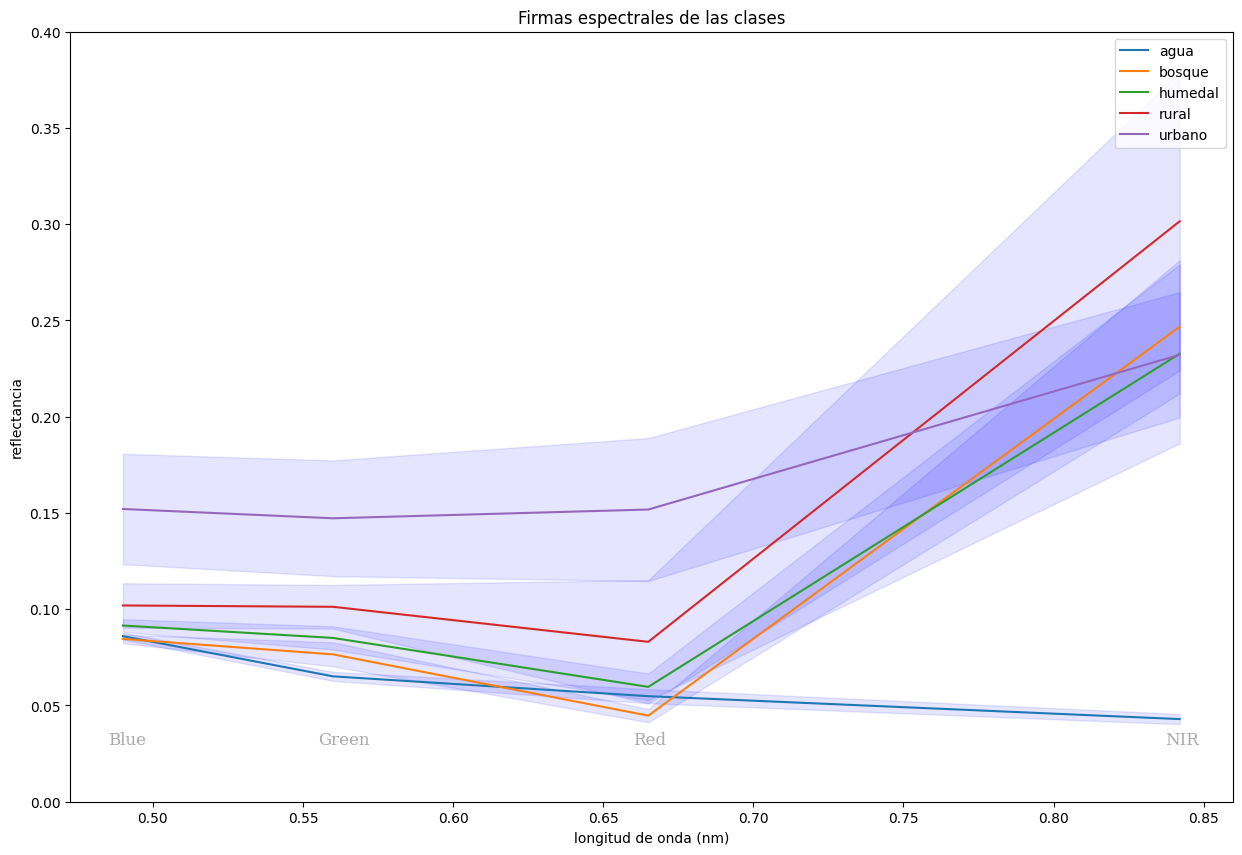

In [20]:
B_G_R_NIR = [0.49, 0.56, 0.665, 0.842]
fig, ax = plt.subplots(figsize=(15, 10))

for j, l in enumerate(clases):
    S = np.where(Y==l)[0]
    data_vis_clase = X[S,:-1]
    media_clase = data_vis_clase.mean(axis=0)
    std_clase = data_vis_clase.std(axis=0)
    ax.plot(B_G_R_NIR, media_clase, label=l)
    ax.fill_between(B_G_R_NIR, media_clase - std_clase, media_clase + std_clase, color='b', alpha=.1)

ax.set_ylim(0, 0.4)
ax.legend()
ax.set_xlabel("longitud de onda (nm)")
ax.set_ylabel("reflectancia")

ax.set_title('Firmas espectrales de las clases')
font = {'family':'serif', 'color':'darkgray', 'size':12}

for x, t in zip(B_G_R_NIR, ['Blue', 'Green', 'Red', 'NIR']):
    ax.text(x - 0.005, 0.03, t, fontdict=font)

plt.show()

## Boxplots, Violinplots y Scatterplots

```python
# Armo un dataframe con los datos etiquetados
data = pd.DataFrame({'B':X[:,0],
                     'G':X[:,1],
                     'R':X[:,2],
                     'NIR':X[:,3],
                     'NDVI':X[:,4],
                     'clase':Y})

data['clase_cat'] = data['clase'].map(clase_dict).astype("category")

# y los grafico de diferentes formas
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, x='clase', y='NDVI', ax=ax)
plt.show()
```

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


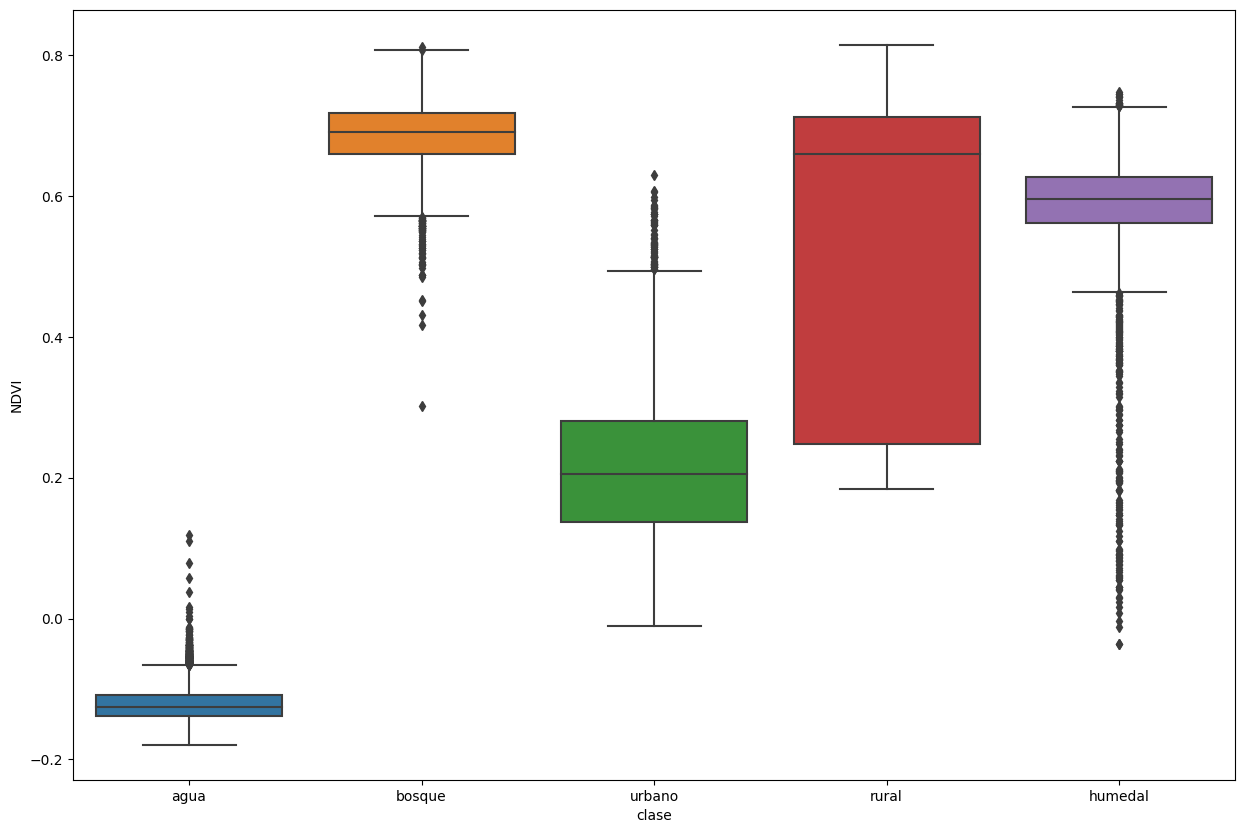

In [21]:
data = pd.DataFrame({'B':X[:,0],
                     'G':X[:,1],
                     'R':X[:,2],
                     'NIR':X[:,3],
                     'NDVI':X[:,4],
                     'clase':Y})

data['clase_cat'] = data['clase'].map(clase_dict).astype("category")

# y los grafico de diferentes formas
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, x='clase', y='NDVI', ax=ax)
plt.show()

```python
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=data, x='clase', y='NDVI', ax=ax)
plt.show()
```

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


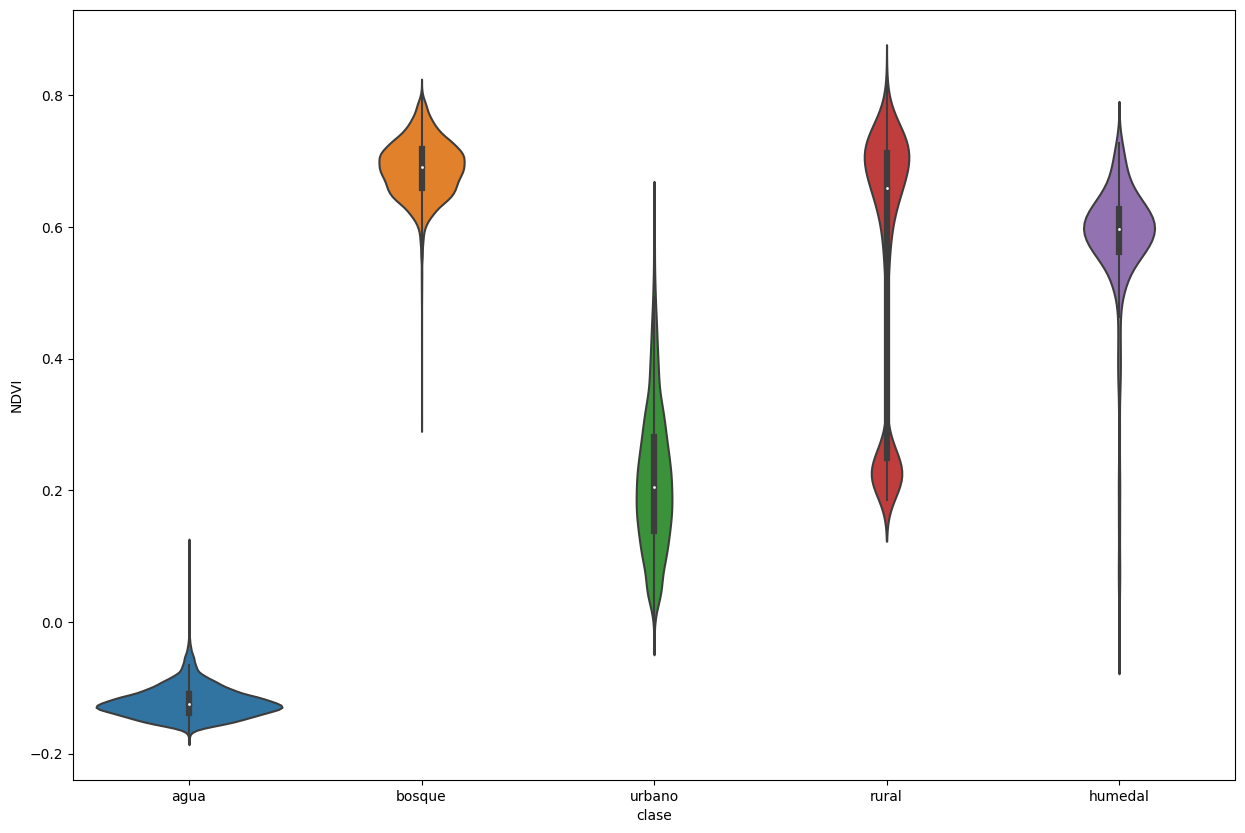

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=data, x='clase', y='NDVI', ax=ax)
plt.show()

```python
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='R', y='G',hue='clase', alpha=0.3, s=15, ax=ax)
plt.show()
```

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-package

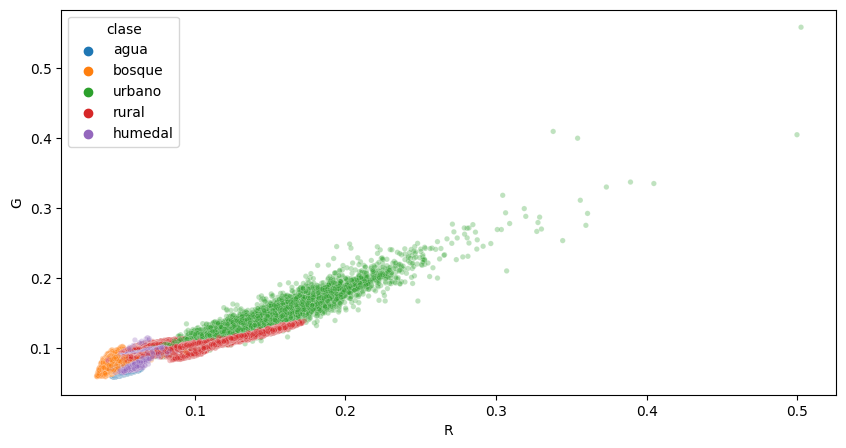

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='R', y='G',hue='clase', alpha=0.3, s=15, ax=ax)
plt.show()

### 9.1 Ejercicio de visualización de datos (opcional)
1. Repetir el violinplot pero graficando solo para la clase _rural_
1. Repetir el scatterplot usando los ejes:
    1. Red y NIR
    1. NDVI y Blue
    1. NDVI y Green

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


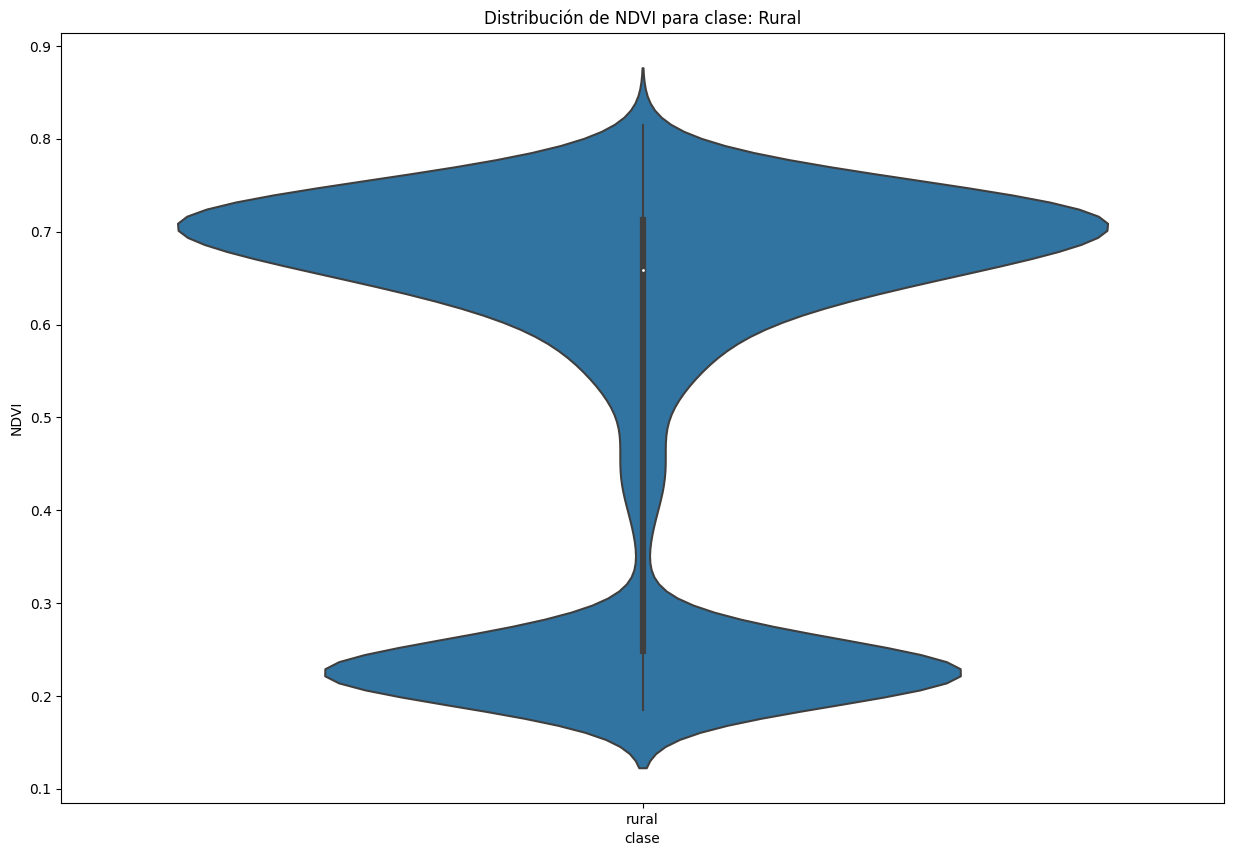

In [24]:
data_filtrada = data[data["clase"] == "rural"]

# Graficamos
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=data_filtrada, x='clase', y='NDVI', ax=ax)
plt.title(f"Distribución de NDVI para clase: Rural")
plt.show()

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-package

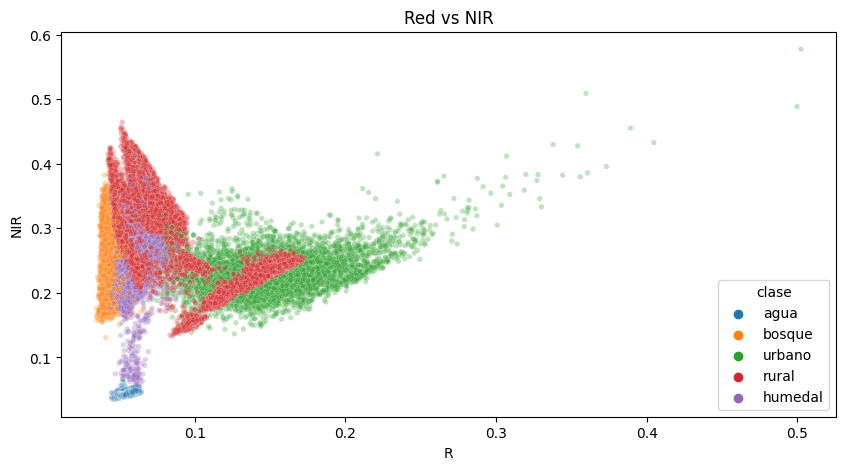

In [25]:
#Red vs NIR
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='R', y='NIR', hue='clase', alpha=0.3, s=15, ax=ax)
ax.set_title('Red vs NIR')
plt.show()

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-package

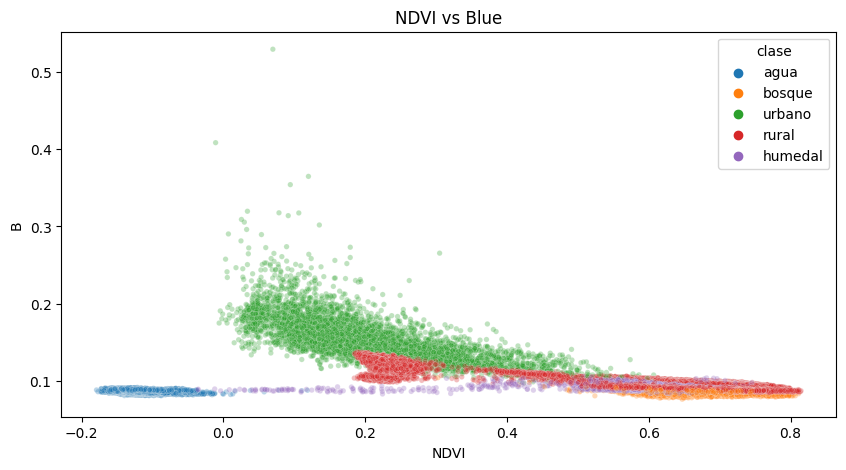

In [26]:
# NDVI vs Blue
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='NDVI', y='B', hue='clase', alpha=0.3, s=15, ax=ax)
ax.set_title('NDVI vs Blue')
plt.show()

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-package

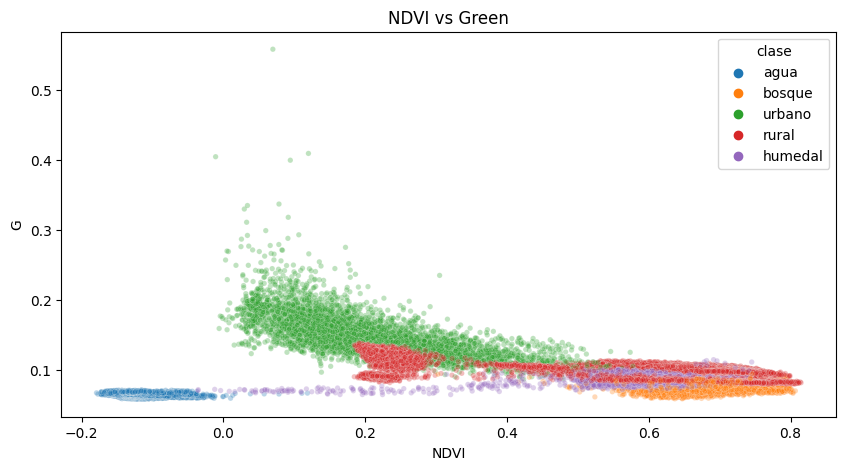

In [27]:
#NDVI vs Green
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='NDVI', y='G', hue='clase', alpha=0.3, s=15, ax=ax)
ax.set_title('NDVI vs Green')
plt.show()

### 9.2 Ejercicio de etiquetado
1. En los diferentes gráficos se observa que la clase _rural_ está compuesta de al menos dos clases mezcaldas. 
    1. Mirando tu último violin-plot, definir un umbral que separe las dos potenciales clases diferentes.
    1. Generar un nuevo geoDataFrame llamado rois_rural (a partir de rois_vec) que tenga solo aquellos ROIS de la clase 'rural'. Luego agregar una columna con el promedio de los valores de NDVI del ROI correspondiente.
    1. Modificar la columna 'clase' de rois_rural de manera de distinguir los dos tipos de ROIS rurales (los que tengan NDVI alto y bajo, de acuerdo al umbral seleccionado).
    1. Graficar la imagen Sentinel-2 RGB ecualizada y sobre ella los bordes de los dos tipos de ROIS rurales con colores diferentes.
    1. Observando estas últimas dos imágenes tratar de entender a qué corresponden las dos subclases de 'rural'. Asignarles un nombre adecuado.
    1. Modificar el archivo _geoJSON_ usando estas nuevas etiquetas, según corresponda, para la vieja clase 'rural'.
    1. Repetir los gráficos anteriores (firmas espectrales, violinplots, y scatterplots) considerando las nuevas etiquetas.


```python
## Ayuda Ejercicio 9.2 B

# Generar un nuevo GeoDataFrame llamados rois_rural a partir de rois_vec
rois_rural = data.loc[data['clase']=='rural', :].copy()

# Agregar una columna con el promedio de los valores de NDVI del ROI correspondiente:
with rasterio.open(raster_fn) as src:
    for index, row in rois_rural.iterrows():
        geom = ...
        clip, _transform = mask(..., ..., crop=..., nodata=...)
        d, x, y = clip.shape
        D = clip.reshape([d, ...]).T  # Rompemos la estructura espacial, pero no espectral
        DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
        mndvi = DX[:,-1].mean()  # Calculamos el NDVI medio
        rois_rural.loc[..., 'NDVI_medio'] = mndvi  # Asignamos al polígono el valor de NDVI medio
```

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_18664\3301270605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['subclase'] = data_filtrada['NDVI'].apply(lambda x: 'rural_sin_vegetación' if x < 0.45 else 'rural_con_vegetación')
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\si

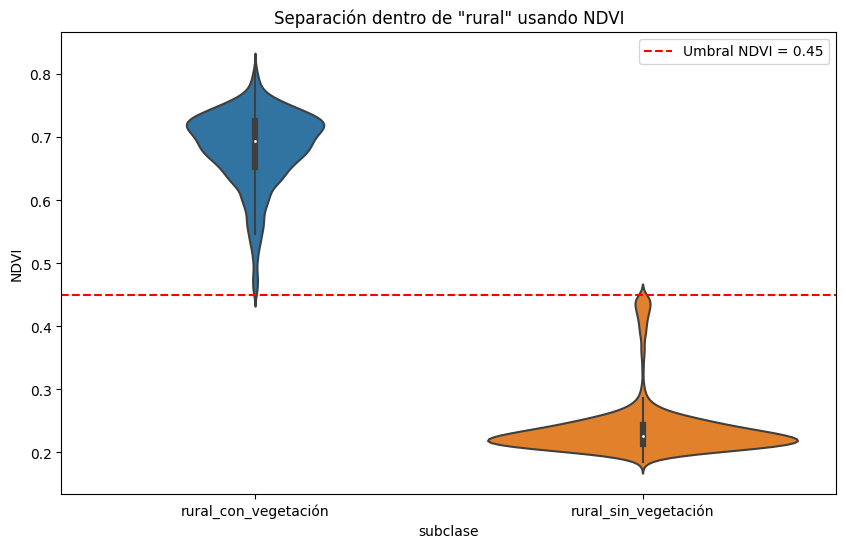

In [28]:
#A
'''Observando el violinplot de la clase "rural", se ve claramente una distribución bimodal con dos agrupamientos principales de valores de NDVI:

Un primer grupo con NDVI entre 0.15 y 0.35

Un segundo grupo con NDVI entre 0.6 y 0.8

Entre ambos, hay un valle bien definido aproximadamente en NDVI ≈ 0.45'''

data_filtrada['subclase'] = data_filtrada['NDVI'].apply(lambda x: 'rural_sin_vegetación' if x < 0.45 else 'rural_con_vegetación')

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=data_filtrada, x='subclase', y='NDVI', ax=ax)
plt.title('Separación dentro de "rural" usando NDVI')
plt.axhline(0.45, color='red', linestyle='--', label='Umbral NDVI = 0.45')
plt.legend()
plt.show()

In [29]:
# B
rois_rural = rois_vec[rois_vec['clase'] == 'rural'].copy()
rois_rural['NDVI_medio'] = np.nan

with rasterio.open(raster_fn) as src:
    nodata = src.nodata  # O definilo manualmente si no existe
    for index, row in rois_rural.iterrows():
        geom = [row['geometry']]  # ¡En forma de lista!

        # Extraemos el raster que intersecta el polígono
        try:
            clip, _ = mask(src, geom, crop=True, nodata=nodata)

            # Reorganizamos: de (bandas, filas, cols) a (n_pixeles, bandas)
            d, x, y = clip.shape
            D = clip.reshape([d, x * y]).T  # (n_pixeles, n_bandas)

            # Filtramos filas sin nodata en ninguna banda
            if nodata is not None:
                D = D[np.all(D != nodata, axis=1)]

            # NDVI está en la última banda: -1
            if len(D) > 0:
                mndvi = D[:, -1].mean()
                rois_rural.loc[index, 'NDVI_medio'] = mndvi
            else:
                rois_rural.loc[index, 'NDVI_medio'] = np.nan

        except Exception as e:
            print(f"Error en ROI {index}: {e}")
            rois_rural.loc[index, 'NDVI_medio'] = np.nan

In [30]:
rois_rural

,id,clase,geometry,NDVI_medio
3,4,rural,"MULTIPOLYGON (((329571.576 6156408.423, 329423...",0.359566
4,6,rural,"MULTIPOLYGON (((326543.687 6160726.512, 326657...",0.366698
10,10,rural,"MULTIPOLYGON (((328414.423 6156373.136, 328255...",0.117907
11,10,rural,"MULTIPOLYGON (((331051.342 6156135.643, 331290...",0.111041
12,11,rural,"MULTIPOLYGON (((331334.054 6156480.262, 331583...",0.308049
16,15,rural,"MULTIPOLYGON (((324327.798 6160114.145, 324716...",0.085772


In [31]:
import numpy as np
import rasterio
from rasterio.mask import mask

for i, row in rois_rural.iterrows():
    clase = row['clase']
    geom = row['geometry']
    ndvi_medio_registrado = row['NDVI_medio']

    try:
        with rasterio.open(raster_fn) as src:
            clip, _transform = mask(src, [geom], crop=True, nodata=nodata)
        
        d, x, y = clip.shape
        D = clip.reshape([d, x*y]).T
        DX = D[np.all(D != nodata, axis=1)]
        
        if DX.shape[0] == 0:
            print(f'Polígono {i} sin datos válidos.')
            continue
        
        red = DX[:, 2]
        nir = DX[:, 3]
        ndvi = (nir - red) / (nir + red + 1e-6)
        ndvi_medio_calculado = ndvi.mean()

        print(f"\nPolígono {i} (ID={row['id']}):")
        print(f"Clase: {clase}")
        print(f"NDVI medio registrado: {ndvi_medio_registrado:.4f}")
        print(f"NDVI medio calculado : {ndvi_medio_calculado:.4f}")
        print(f"Diferencia            : {abs(ndvi_medio_calculado - ndvi_medio_registrado):.4f}")

    except Exception as e:
        print(f"Error al procesar polígono {i}: {e}")



Polígono 3 (ID=4):
Clase: rural
NDVI medio registrado: 0.3596
NDVI medio calculado : 0.3596
Diferencia            : 0.0000

Polígono 4 (ID=6):
Clase: rural
NDVI medio registrado: 0.3667
NDVI medio calculado : 0.3667
Diferencia            : 0.0000

Polígono 10 (ID=10):
Clase: rural
NDVI medio registrado: 0.1179
NDVI medio calculado : 0.1179
Diferencia            : 0.0000

Polígono 11 (ID=10):
Clase: rural
NDVI medio registrado: 0.1110
NDVI medio calculado : 0.1110
Diferencia            : 0.0000

Polígono 12 (ID=11):
Clase: rural
NDVI medio registrado: 0.3080
NDVI medio calculado : 0.3080
Diferencia            : 0.0000

Polígono 16 (ID=15):
Clase: rural
NDVI medio registrado: 0.0858
NDVI medio calculado : 0.0858
Diferencia            : 0.0000


In [32]:
# Cargamos nuestros polígonos y nos quedamos con uno de los elementos
rois_rural = rois_rural.reset_index(drop=True)
clase, geom, ndvi_medio = rois_rural.loc[0, ['clase', 'geometry', 'NDVI_medio']].to_list()

with rasterio.open(raster_fn) as src:
    
    clip, _transform = mask(src, [geom], crop=True, nodata=nodata)

d, x, y = clip.shape
D = clip.reshape([d, x*y]).T  # rompemos la estructura espacial, pero no espectral
DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
DY = np.repeat(clase, DX.shape[0])  # Generamos un array con la etiqueta de la clase


print('Clase  Blue   Green  Red    NIR     NDVI')
for i in range(10):
    j = np.random.randint(DX.shape[0])
    print(f'{DY[j]:6s} {DX[j,0]:.3f}  {DX[j,1]:.3f}  {DX[j,2]:.3f}  {DX[j,3]:.3f}  {DX[j,4]: .3f}')

Clase  Blue   Green  Red    NIR     NDVI
rural  0.000  0.000  0.000  0.000   0.000
rural  0.000  0.000  0.000  0.000   0.000
rural  0.097  0.099  0.062  0.393   0.726
rural  0.000  0.000  0.000  0.000   0.000
rural  0.000  0.000  0.000  0.000   0.000
rural  0.000  0.000  0.000  0.000   0.000
rural  0.000  0.000  0.000  0.000   0.000
rural  0.095  0.097  0.062  0.366   0.711
rural  0.095  0.098  0.060  0.383   0.731
rural  0.000  0.000  0.000  0.000   0.000


In [33]:
with rasterio.open(raster_fn) as src:
    d = src.count 

# Clases de los ROIs
clases = list(set(rois_rural['clase']))
# clases = list(rois_vec['clase'].unique())
clases.sort()

In [34]:
clase_dict = {clase: i for i, clase in enumerate(clases)}

X = np.empty((0, d), dtype=np.float32)  # array vacío para almacenar valores espectrales
Y = np.empty(0, dtype=int)

In [35]:
with rasterio.open(raster_fn) as src:
    for index, row in rois_rural.iterrows():
        clase, geom, ndvi_medio = row[['clase', 'geometry', 'NDVI_medio']].to_list()
        clip, _transform = mask(src, [geom], crop=True, nodata=nodata)
        d, x, y = clip.shape
        D = clip.reshape([d, x*y]).T  # Rompemos la estructura espacial, pero no espectral
        DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
        DY = np.repeat(clase, DX.shape[0])  # Etiqueta de clase para cada píxel
        DNDVI = np.repeat(ndvi_medio, DX.shape[0])  # Repetimos NDVI_medio para cada píxel
        
        X = np.concatenate((X, DX))  # Datos espectrales
        Y = np.concatenate((Y, DY))  # Etiquetas clase
        # Para NDVI_medio podés hacer algo similar, por ejemplo:
        if 'NDVI_medio_arr' not in locals():
            NDVI_medio_arr = DNDVI
        else:
            NDVI_medio_arr = np.concatenate((NDVI_medio_arr, DNDVI))

In [36]:
data_rural = pd.DataFrame({
    'B': X[:, 0],
    'G': X[:, 1],
    'R': X[:, 2],
    'NIR': X[:, 3],
    'NDVI_raster': (X[:, 3] - X[:, 2]) / (X[:, 3] + X[:, 2] + 1e-6),
    'clase': Y,
    'NDVI_medio_poligono': NDVI_medio_arr
})

In [37]:
data_rural

,B,G,R,NIR,NDVI_raster,clase,NDVI_medio_poligono
0,0.0,0.0,0.0,0.0,0.0,rural,0.359566
1,0.0,0.0,0.0,0.0,0.0,rural,0.359566
2,0.0,0.0,0.0,0.0,0.0,rural,0.359566
3,0.0,0.0,0.0,0.0,0.0,rural,0.359566
4,0.0,0.0,0.0,0.0,0.0,rural,0.359566
...,...,...,...,...,...,...,...
30886,0.0,0.0,0.0,0.0,0.0,rural,0.085772
30887,0.0,0.0,0.0,0.0,0.0,rural,0.085772
30888,0.0,0.0,0.0,0.0,0.0,rural,0.085772
30889,0.0,0.0,0.0,0.0,0.0,rural,0.085772


In [38]:
data_rural["NDVI_raster"].value_counts()

NDVI_raster
0.000000    15328
0.219511        3
0.211401        3
0.740524        3
0.227060        3
            ...  
0.723047        1
0.711016        1
0.707475        1
0.694897        1
0.263076        1
Name: count, Length: 15221, dtype: int64

In [39]:
df_rural_copy = data_rural.copy(deep=True)
df_rural_copy

,B,G,R,NIR,NDVI_raster,clase,NDVI_medio_poligono
0,0.0,0.0,0.0,0.0,0.0,rural,0.359566
1,0.0,0.0,0.0,0.0,0.0,rural,0.359566
2,0.0,0.0,0.0,0.0,0.0,rural,0.359566
3,0.0,0.0,0.0,0.0,0.0,rural,0.359566
4,0.0,0.0,0.0,0.0,0.0,rural,0.359566
...,...,...,...,...,...,...,...
30886,0.0,0.0,0.0,0.0,0.0,rural,0.085772
30887,0.0,0.0,0.0,0.0,0.0,rural,0.085772
30888,0.0,0.0,0.0,0.0,0.0,rural,0.085772
30889,0.0,0.0,0.0,0.0,0.0,rural,0.085772


In [40]:
df_rural_copy['clase'] = df_rural_copy['NDVI_raster'].apply(
    lambda ndvi: 'rural_baja_vegetacion' if ndvi < 0.45 else 'rural_alta_vegetacion'
)

In [41]:
df_rural_copy

,B,G,R,NIR,NDVI_raster,clase,NDVI_medio_poligono
0,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.359566
1,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.359566
2,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.359566
3,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.359566
4,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.359566
...,...,...,...,...,...,...,...
30886,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.085772
30887,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.085772
30888,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.085772
30889,0.0,0.0,0.0,0.0,0.0,rural_baja_vegetacion,0.085772


In [42]:
df_rural_copy["clase"].value_counts()

clase
rural_baja_vegetacion    20139
rural_alta_vegetacion    10752
Name: count, dtype: int64

In [58]:
rois_rural

,id,clase,geometry,NDVI_medio
0,4,rural,"MULTIPOLYGON (((329571.576 6156408.423, 329423...",0.359566
1,6,rural,"MULTIPOLYGON (((326543.687 6160726.512, 326657...",0.366698
2,10,rural,"MULTIPOLYGON (((328414.423 6156373.136, 328255...",0.117907
3,10,rural,"MULTIPOLYGON (((331051.342 6156135.643, 331290...",0.111041
4,11,rural,"MULTIPOLYGON (((331334.054 6156480.262, 331583...",0.308049
5,15,rural,"MULTIPOLYGON (((324327.798 6160114.145, 324716...",0.085772


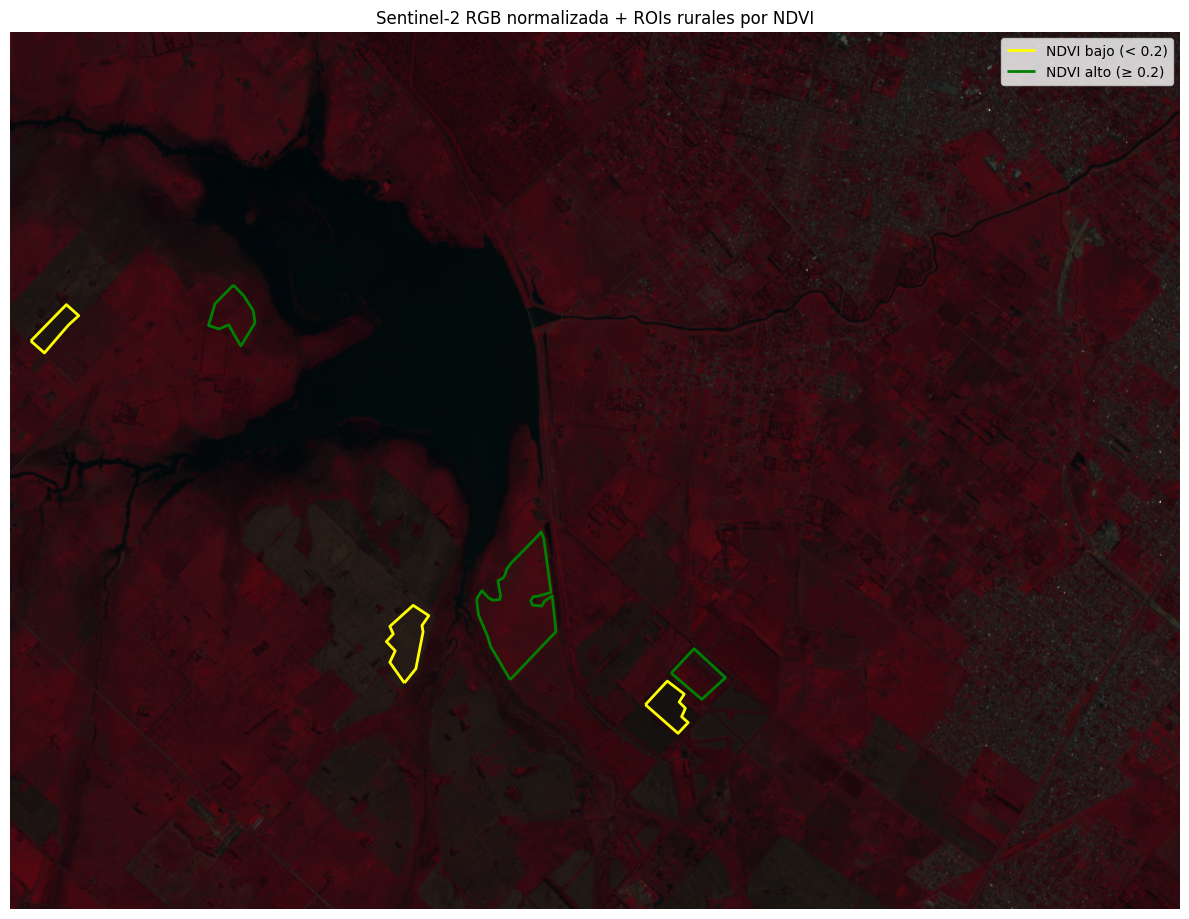

In [61]:
import numpy as np
import rasterio
from rasterio.plot import reshape_as_image
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt

# Cargar bandas RGB (Sentinel-2 típicamente: B=2, G=3, R=4)
with rasterio.open(raster_fn) as src:
    r = src.read(4).astype(float)
    g = src.read(3).astype(float)
    b = src.read(2).astype(float)
    extent = plotting_extent(src)
    crs = src.crs

# Normalizar cada banda para que quede en rango 0-1 (simple min-max)
def normalize(band):
    return (band - band.min()) / (band.max() - band.min() + 1e-10)

rgb_norm = np.dstack([
    normalize(r),
    normalize(g),
    normalize(b)
])

rois_baja_veg = rois_rural[rois_rural['NDVI_medio'] < 0.2]
rois_alta_veg = rois_rural[rois_rural['NDVI_medio'] >= 0.2]

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(rgb_norm, extent=extent)

#colors = {
    #'rural_baja_vegetacion': 'yellow',
    #'rural_alta_vegetacion': 'green'
#}

# Dibujar bordes
rois_baja_veg.boundary.plot(ax=ax, edgecolor='yellow', linewidth=2, label='NDVI bajo (< 0.2)')
rois_alta_veg.boundary.plot(ax=ax, edgecolor='green', linewidth=2, label='NDVI alto (≥ 0.2)')

# Decoración
ax.legend()
ax.set_title('Sentinel-2 RGB normalizada + ROIs rurales por NDVI')
ax.axis('off')
plt.tight_layout()
plt.show()

A partir de la clasificación de los polígonos rurales en función del índice NDVI medio y su análisis visual sobre la imagen Sentinel-2 RGB, se identificaron dos subclases de uso del suelo rural:

Campo cultivado: polígonos con valores de NDVI ≥ 0.2, asociados a lotes con vegetación activa. Estos sectores muestran cobertura vegetal significativa, compatible con cultivos en desarrollo o pasturas, y se destacan en la imagen por su mayor respuesta en el canal rojo (infrarrojo cercano).

Lote agrícola sin cultivo: polígonos con valores de NDVI < 0.2, correspondientes a áreas rurales sin vegetación activa. Visualmente, se presentan más oscuros, sin señal de cultivo, lo que sugiere que están en reposo, con suelo desnudo o con residuos de cosecha.

Esta diferenciación permite refinar la clasificación del uso del suelo dentro de zonas rurales, aportando información clave para el monitoreo agrícola y la planificación territorial basada en teledetección.

# Las clases elegidas son rural_cultivado, rural_sincultivo

In [63]:
rois_rural

,id,clase,geometry,NDVI_medio
0,4,rural,"MULTIPOLYGON (((329571.576 6156408.423, 329423...",0.359566
1,6,rural,"MULTIPOLYGON (((326543.687 6160726.512, 326657...",0.366698
2,10,rural,"MULTIPOLYGON (((328414.423 6156373.136, 328255...",0.117907
3,10,rural,"MULTIPOLYGON (((331051.342 6156135.643, 331290...",0.111041
4,11,rural,"MULTIPOLYGON (((331334.054 6156480.262, 331583...",0.308049
5,15,rural,"MULTIPOLYGON (((324327.798 6160114.145, 324716...",0.085772


In [ ]:
import geopandas as gpd
import pandas as pd


# --- 2. Crear o cargar los NDVI medios por ID ---
# Si los tenés en un archivo, usá pd.read_csv('ndvi.csv') por ejemplo
ndvi_data = pd.DataFrame({
    'id': [4, 6, 10, 10, 11, 15],
    'NDVI_medio': [0.359566, 0.366698, 0.117907, 0.111041, 0.308049, 0.085772]
})

# --- 3. Unir los datos NDVI al GeoDataFrame por ID ---
gdf = gdf.merge(ndvi_data, on='id', how='left')

# --- 4. Reemplazar la clase 'rural' por subclases según NDVI ---
def clasificar(row):
    if row['clase'] == 'rural':
        if row['NDVI_medio'] >= 0.2:
            return 'Campo cultivado'
        else:
            return 'Lote agrícola en barbecho'
    return row['clase']

gdf['clase'] = gdf.apply(clasificar, axis=1)

# --- 5. Guardar nuevo GeoJSON con clases actualizadas ---
gdf.to_file("rois_rural_actualizado.geojson", driver="GeoJSON")


In [64]:
rois_vec

,id,clase,geometry
0,1,agua,"MULTIPOLYGON (((327627.391 6161396.182, 327560..."
1,2,bosque,"MULTIPOLYGON (((327996.99 6163381.143, 328118...."
2,3,urbano,"MULTIPOLYGON (((334008.857 6163386.371, 334573..."
3,4,rural,"MULTIPOLYGON (((329571.576 6156408.423, 329423..."
4,6,rural,"MULTIPOLYGON (((326543.687 6160726.512, 326657..."
5,6,urbano,"MULTIPOLYGON (((336664.534 6160607.32, 336840...."
6,7,humedal,"MULTIPOLYGON (((327973.465 6155108.161, 327991..."
7,8,humedal,"MULTIPOLYGON (((328595.824 6161485.053, 328600..."
8,8,humedal,"MULTIPOLYGON (((324790.574 6154479.398, 324681..."
9,9,humedal,"MULTIPOLYGON (((328585.369 6157966.02, 328575...."


In [66]:
rois_rural_vf = rois_rural.copy(deep=True)


def clasificar(row):
    if row['clase'] == 'rural':
        if row['NDVI_medio'] >= 0.2:
            return 'rural_cultivado'
        else:
            return 'rural_sincultivo'
    return row['clase']

rois_rural_vf['clase'] = rois_rural_vf.apply(clasificar, axis=1)

In [67]:
rois_rural_vf

,id,clase,geometry,NDVI_medio
0,4,rural_cultivado,"MULTIPOLYGON (((329571.576 6156408.423, 329423...",0.359566
1,6,rural_cultivado,"MULTIPOLYGON (((326543.687 6160726.512, 326657...",0.366698
2,10,rural_sincultivo,"MULTIPOLYGON (((328414.423 6156373.136, 328255...",0.117907
3,10,rural_sincultivo,"MULTIPOLYGON (((331051.342 6156135.643, 331290...",0.111041
4,11,rural_cultivado,"MULTIPOLYGON (((331334.054 6156480.262, 331583...",0.308049
5,15,rural_sincultivo,"MULTIPOLYGON (((324327.798 6160114.145, 324716...",0.085772


In [69]:
rois_vec_vf = rois_vec.copy(deep=True)
rois_vec_vf = rois_vec_vf[rois_vec_vf['clase'] != 'rural']

In [70]:
rois_rural_red = rois_rural_vf.drop(columns=['NDVI_medio'])

gdf_final = pd.concat([rois_vec_vf, rois_rural_red], ignore_index=True)

# (Opcional) ordenamos por id para mantener orden lógico
gdf_final = gdf_final.sort_values('id').reset_index(drop=True)

In [71]:
gdf_final

,id,clase,geometry
0,1,agua,"MULTIPOLYGON (((327627.391 6161396.182, 327560..."
1,2,bosque,"MULTIPOLYGON (((327996.99 6163381.143, 328118...."
2,3,urbano,"MULTIPOLYGON (((334008.857 6163386.371, 334573..."
3,4,rural_cultivado,"MULTIPOLYGON (((329571.576 6156408.423, 329423..."
4,6,urbano,"MULTIPOLYGON (((336664.534 6160607.32, 336840...."
5,6,rural_cultivado,"MULTIPOLYGON (((326543.687 6160726.512, 326657..."
6,7,humedal,"MULTIPOLYGON (((327973.465 6155108.161, 327991..."
7,8,humedal,"MULTIPOLYGON (((328595.824 6161485.053, 328600..."
8,8,humedal,"MULTIPOLYGON (((324790.574 6154479.398, 324681..."
9,9,humedal,"MULTIPOLYGON (((328585.369 6157966.02, 328575...."


In [72]:
gdf_final.to_file('./raw_data/vector/rois_dique_actualizado.geojson', driver='GeoJSON')

In [80]:
# archivos
vector_fn = os.path.join(path_vector, 'rois_dique_actualizado.geojson')
raster_fn = os.path.join(path_proc, 'S2_dique_20181006.tif')

# Cargamos nuestros polígonos
rois_vf = gpd.read_file(vector_fn)

# Definimos un valor fuera de nuestro rango válido para los datos no válidos
nodata = -255

with rasterio.open(raster_fn) as src:
    d = src.count 

# Clases de los ROIs
clases = list(set(rois_vf['clase']))
# clases = list(rois_vec['clase'].unique())
clases.sort()

# Generamos valores categóricos para nuestras clases
clase_dict = {clase: i for i, clase in enumerate(clases)}

X = np.empty((0, d), dtype=np.float32)  # array vacío para almacenar valores espectrales
Y = np.empty(0, dtype=int)

with rasterio.open(raster_fn) as src:
    for index, row in rois_vf.iterrows():
        clase, geom = row[['clase', 'geometry']].to_list()
        clip, _transform = mask(src, [geom], crop=True, nodata=nodata)
        d, x, y = clip.shape
        D = clip.reshape([d, x*y]).T  # Rompemos la estructura espacial, pero no espectral
        DX = D[np.all(D != nodata, axis=1)]  # Nos quedamos con los valores útiles
        DY = np.repeat(clase, DX.shape[0])  # Generamos un array con la etiqueta de la clase
        X = np.concatenate((X, DX))  # Concatenamos nuestros datos espectrales
        Y = np.concatenate((Y, DY))  # Concatenamos las etiquetas de la clase

C:\Python39\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Several features with id = 6 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


In [82]:
R = 10  # cantindad a elegir al azar
N = len(Y)

print('Clase      Blue   Green  Red    NIR     NDVI')
for i in range(R):
    j = np.random.randint(N)
    print(f'{clase_dict[Y[j]]:d}.{Y[j]:<7}: {X[j,0]:.3f}  {X[j,1]:.3f}  {X[j,2]:.3f}  {X[j,3]:.3f}  {X[j,4]: .3f}')

Clase      Blue   Green  Red    NIR     NDVI
1.bosque : 0.084  0.074  0.044  0.241   0.693
0.agua   : 0.085  0.062  0.052  0.042  -0.104
1.bosque : 0.082  0.086  0.042  0.280   0.739
0.agua   : 0.090  0.070  0.062  0.054  -0.063
3.rural_cultivado: 0.092  0.097  0.058  0.416   0.756
0.agua   : 0.085  0.064  0.052  0.042  -0.100
0.agua   : 0.087  0.067  0.057  0.043  -0.145
0.agua   : 0.085  0.061  0.052  0.039  -0.144
1.bosque : 0.088  0.085  0.053  0.222   0.617
1.bosque : 0.087  0.074  0.049  0.235   0.658


# Firma Espectral

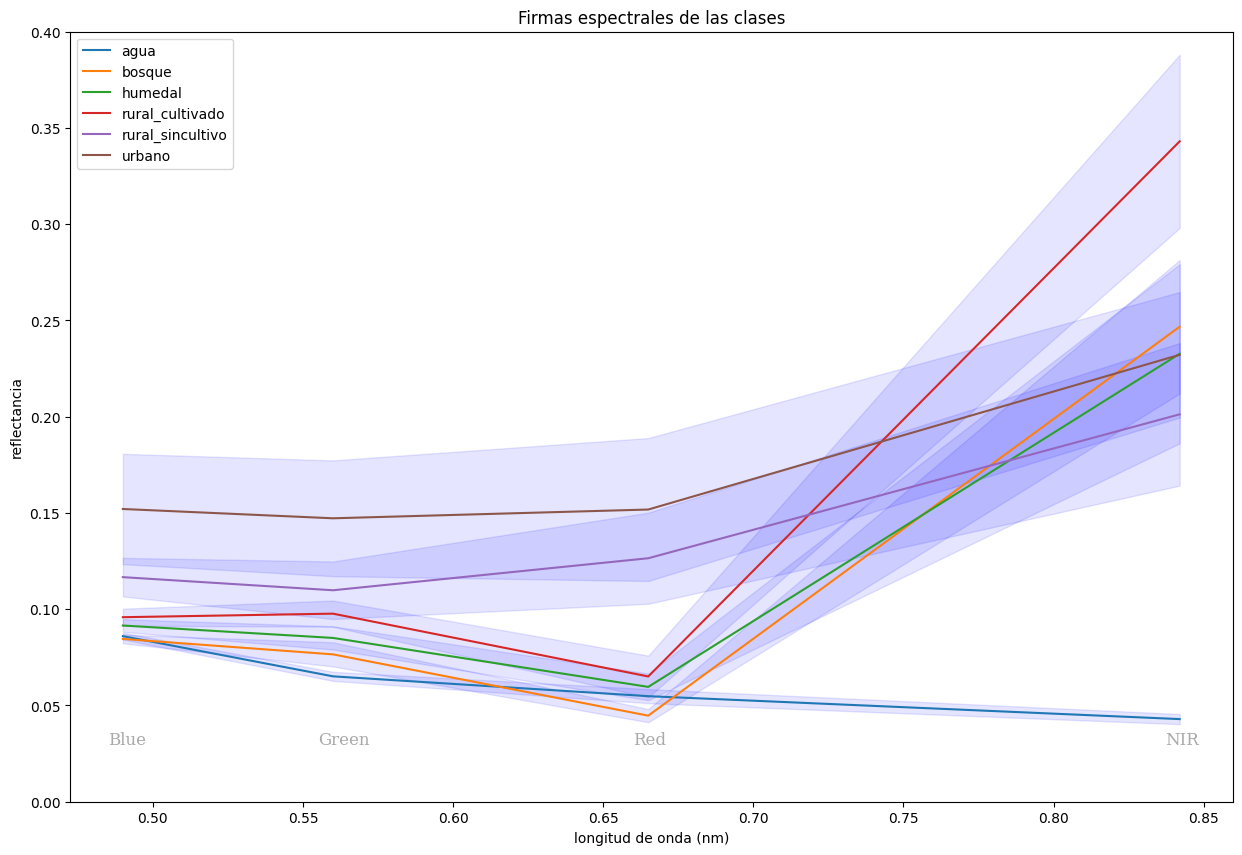

In [83]:
B_G_R_NIR = [0.49, 0.56, 0.665, 0.842]
fig, ax = plt.subplots(figsize=(15, 10))

for j, l in enumerate(clases):
    S = np.where(Y==l)[0]
    data_vis_clase = X[S,:-1]
    media_clase = data_vis_clase.mean(axis=0)
    std_clase = data_vis_clase.std(axis=0)
    ax.plot(B_G_R_NIR, media_clase, label=l)
    ax.fill_between(B_G_R_NIR, media_clase - std_clase, media_clase + std_clase, color='b', alpha=.1)

ax.set_ylim(0, 0.4)
ax.legend()
ax.set_xlabel("longitud de onda (nm)")
ax.set_ylabel("reflectancia")

ax.set_title('Firmas espectrales de las clases')
font = {'family':'serif', 'color':'darkgray', 'size':12}

for x, t in zip(B_G_R_NIR, ['Blue', 'Green', 'Red', 'NIR']):
    ax.text(x - 0.005, 0.03, t, fontdict=font)

plt.show()

# Boxplots, Vioinplots, Scatterplots

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


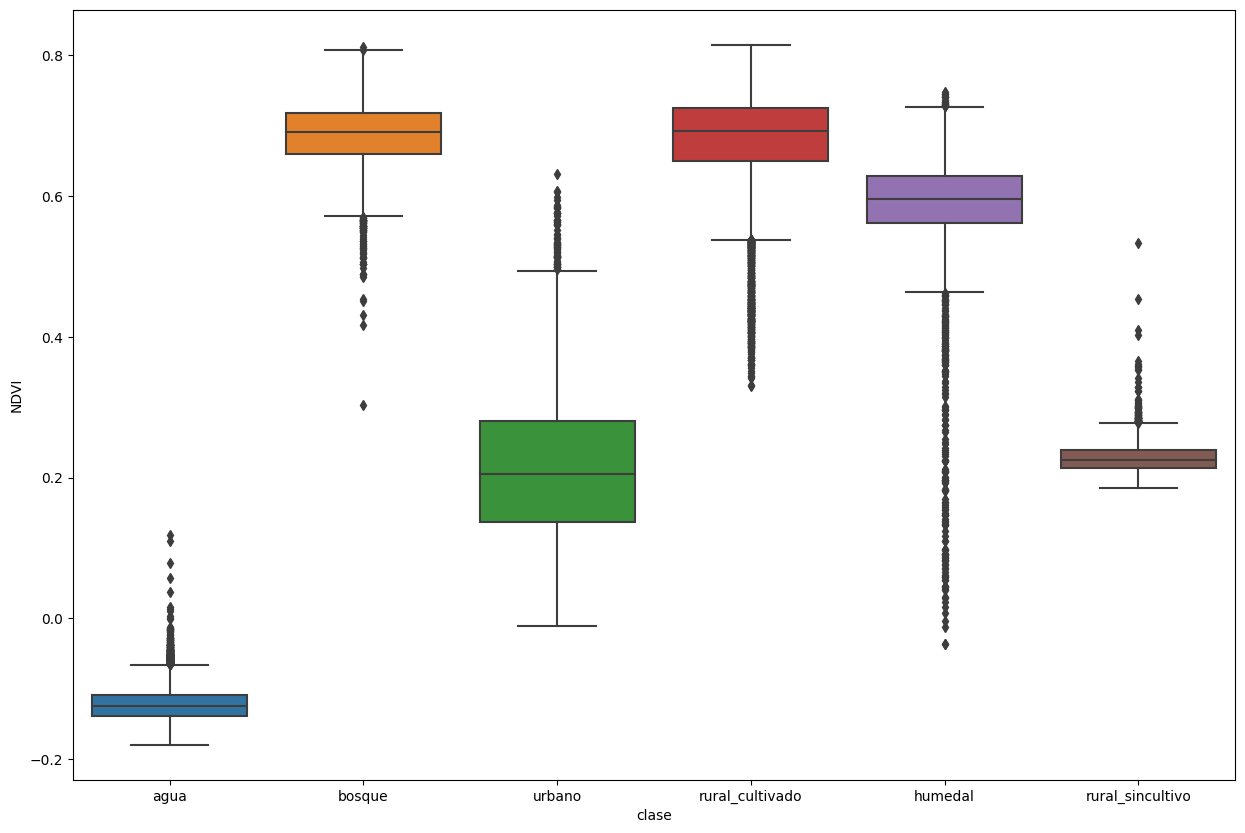

In [84]:
# Armo un dataframe con los datos etiquetados
data = pd.DataFrame({'B':X[:,0],
                     'G':X[:,1],
                     'R':X[:,2],
                     'NIR':X[:,3],
                     'NDVI':X[:,4],
                     'clase':Y})

data['clase_cat'] = data['clase'].map(clase_dict).astype("category")

# y los grafico de diferentes formas
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, x='clase', y='NDVI', ax=ax)
plt.show()

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


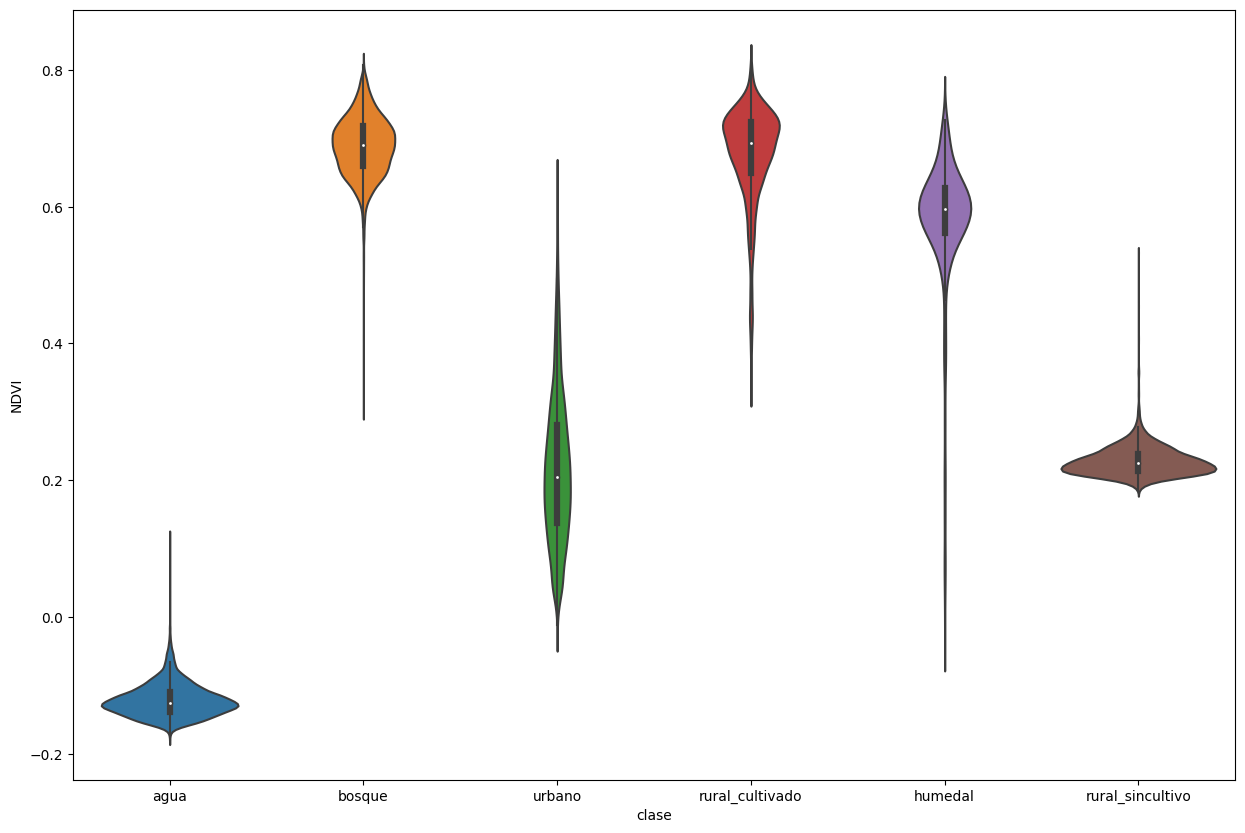

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.violinplot(data=data, x='clase', y='NDVI', ax=ax)
plt.show()

C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python39\lib\site-package

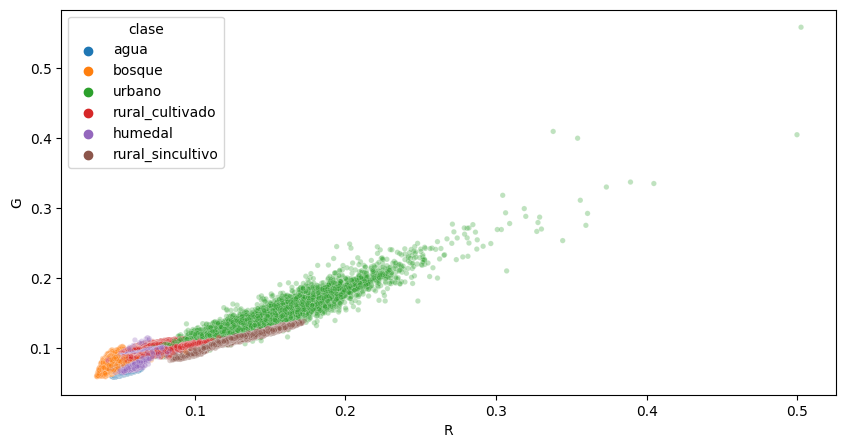

In [86]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='R', y='G',hue='clase', alpha=0.3, s=15, ax=ax)
plt.show()